
Time series regression with "ts" data:
Start = 2, End = 10

Call:
dynlm::dynlm(formula = full_formula, data = data, start = start, 
    end = end)

Residuals:
      2       3       4       5       6       7       8       9      10 
-0.7090  0.6351  1.1754 -2.4834  0.1794  1.5823 -2.0750 -1.2626  2.9579 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 10.112500   9.357528   1.081   0.3590  
L(yt, 1)     0.004385   0.201864   0.022   0.9840  
xt           6.367093   1.440614   4.420   0.0215 *
L(xt, 1)    -3.174659   1.284652  -2.471   0.0900 .
ht           1.119091   0.332364   3.367   0.0435 *
L(ht, 1)    -0.947976   0.318150  -2.980   0.0586 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.923 on 3 degrees of freedom
Multiple R-squared:  0.9159,	Adjusted R-squared:  0.7757 
F-statistic: 6.535 on 5 and 3 DF,  p-value: 0.07663

[1] "Durbin-Watson Test for Autocorrelation:"

	Durbin-Watson test

data:  model


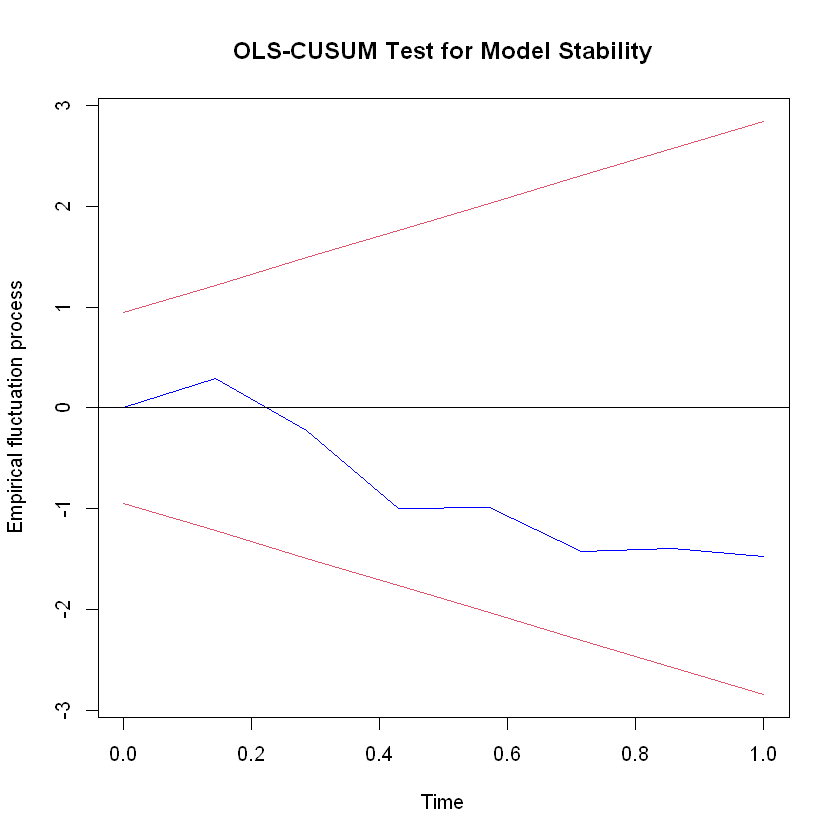

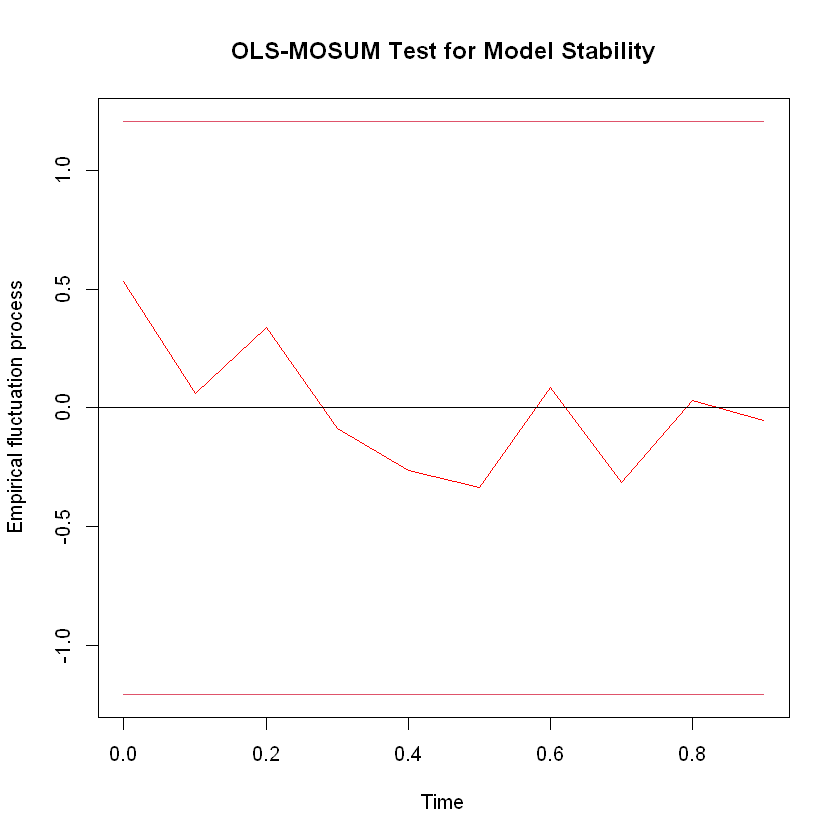

In [ ]:
# Load required libraries
library(tseries)
library(ARDL)
library(lmtest)
library(strucchange)

# Step 1: Create the data frame
data <- data.frame(
    t = c(2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014),
    xt = c(-0.56, 0.07, 0.12, 1.71, 0.46, -1.26, -0.68, -0.44, 1.22, 0.35),
    yt = c(22, 13, 27, 15, 10, 6, 18, 9, 17, 12),
    ht = c(14, 13, 25, 15, 17, 19, 22, 20, 16, 14)
)

# Step 2: Fit the ARDL model
model <- ardl(yt ~ xt + ht, data, order = c(1, 1, 1))

# Step 3: Print the summary of the model
print(summary(model))

# Step 4: Test robustness of the model

# 4.1 Test for autocorrelation using Durbin-Watson test
dw_test <- dwtest(model)
print("Durbin-Watson Test for Autocorrelation:")
print(dw_test)

# 4.2 Test for heteroskedasticity using Breusch-Pagan test
bp_test <- bptest(model)
print("Breusch-Pagan Test for Heteroskedasticity:")
print(bp_test)

# 4.3 Test for normality of residuals using Shapiro-Wilk test
shapiro_test <- shapiro.test(residuals(model))
print("Shapiro-Wilk Test for Normality of Residuals:")
print(shapiro_test)

# Step 5: Stability Test (OLS-CUSUM and OLS-MOSUM)
# Manually specify the formula for the stability test
formula <- yt ~ xt + ht

# Perform CUSUM test
cusum_test <- efp(yt ~ xt + ht, data = data, type = "Rec-CUSUM")
print("CUSUM Test Plot:")
par(bg = "white") # Set background color to white
plot(cusum_test, main = "OLS-CUSUM Test for Model Stability", col = "blue")

# Perform MOSUM test
mosum_test <- efp(yt ~ xt + ht, data = data, type = "OLS-MOSUM")
print("MOSUM Test Plot:")
par(bg = "white") # Set background color to white
plot(mosum_test, main = "OLS-MOSUM Test for Model Stability", col = "red")
